<a href="https://colab.research.google.com/github/akhiluthappa1/data_science/blob/main/daily_prices_AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 18 14:37:48 2019

@author: epinsky
"""

# run this  !pip install pandas_datareader
from pandas_datareader import data as web
import os
import math
import numpy as np 
import pandas as pd
import yfinance as yf

ticker='AAPL'
input_dir = os.getcwd()
output_file = os.path.join(input_dir, ticker + '_weekly_return_volatility.csv')

try:
    df = yf.download(ticker, start="2020-01-01", end="2021-12-31")
    df['Return'] = df['Adj Close'].pct_change()
    df['Return'].fillna(0, inplace = True)
    df['Return'] = 100.0 * df['Return']
    df['Return'] = df['Return'].round(3)        
    df['Date'] = df.index
    df['Date'] = pd.to_datetime(df['Date'])
    df['Week_Number'] = df['Date'].dt.strftime('%U')
    df['Year'] = df['Date'].dt.year 
    df['Day'] = df['Date'].dt.day
    df['Weekday'] = df['Date'].dt.day_name()
    df_2 = df[['Year', 'Week_Number', 'Return']]
    df_2.index = range(len(df))
    df_grouped = df_2.groupby(['Year', 'Week_Number'])['Return'].agg([np.mean, np.std])
    df_grouped.reset_index(['Year', 'Week_Number'], inplace=True)
    df_grouped.rename(columns={'mean': 'mean_return', 'std':'volatility'}, inplace=True)
    df_grouped.fillna(0, inplace=True)
    df_grouped.to_csv(output_file, index=False)
    print("wrote ", len(df_grouped), " lines to file: ", output_file)

#    df_grouped_2 = df_grouped.fillna(0)
#    df_grouped_2.to_csv(output_file, index=False)
    
except Exception as e:
    print(e)


output_file = os.path.join(input_dir, ticker + '_weekly_return_detailed.csv')
combined_df = df.merge(df_grouped, on=['Year', 'Week_Number'], how = 'inner')
combined_df.to_csv(output_file, index=False)
print("\n wrote ", len(combined_df), " lines to file to ", output_file)









[*********************100%***********************]  1 of 1 completed
wrote  105  lines to file:  /content/AAPL_weekly_return_volatility.csv

 wrote  504  lines to file to  /content/AAPL_weekly_return_detailed.csv


generated /content/AAPL_weekly_plots/AAPL_prices_2020-01-03_to_2020-01-17.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-01-17_to_2020-02-03.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-02-03_to_2020-02-18.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-02-18_to_2020-03-03.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-03-03_to_2020-03-17.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-03-17_to_2020-03-31.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-03-31_to_2020-04-15.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-04-15_to_2020-04-29.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-04-29_to_2020-05-13.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-05-13_to_2020-05-28.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-05-28_to_2020-06-11.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-06-11_to_2020-06-25.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-06-25_to_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2020-10-19_to_2020-11-02.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-11-02_to_2020-11-16.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2020-11-16_to_2020-12-01.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-12-01_to_2020-12-15.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2020-12-15_to_2020-12-30.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2020-12-30_to_2021-01-14.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-01-14_to_2021-01-29.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-01-29_to_2021-02-12.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-02-12_to_2021-03-01.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-03-01_to_2021-03-15.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-03-15_to_2021-03-29.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-03-29_to_2021-04-13.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-04-13_to_2021-04-27.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-04-27_to_2021-05-11.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-05-11_to_2021-05-25.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-05-25_to_2021-06-09.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-06-09_to_2021-06-23.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-06-23_to_2021-07-08.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-07-08_to_2021-07-22.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-07-22_to_2021-08-05.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-08-05_to_2021-08-19.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-08-19_to_2021-09-02.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-09-02_to_2021-09-17.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-09-17_to_2021-10-01.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-10-01_to_2021-10-15.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-10-15_to_2021-10-29.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-10-29_to_2021-11-12.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-11-12_to_2021-11-29.jpg
generated /content/AAPL_weekly_plots/AAPL_prices_2021-11-29_to_2021-12-13.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


generated /content/AAPL_weekly_plots/AAPL_prices_2021-12-13_to_2021-12-28.jpg


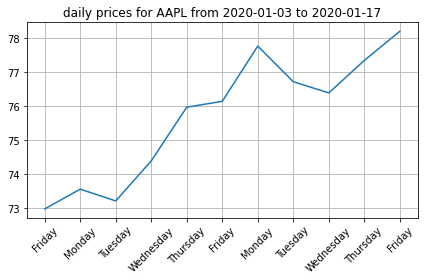

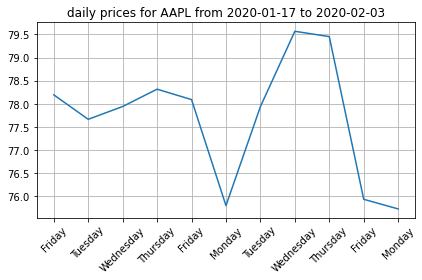

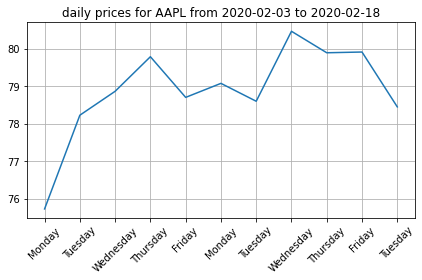

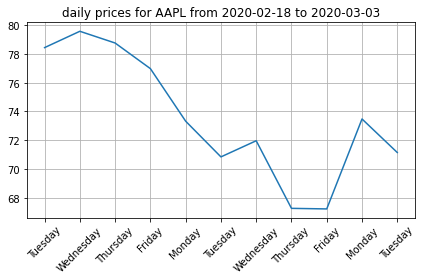

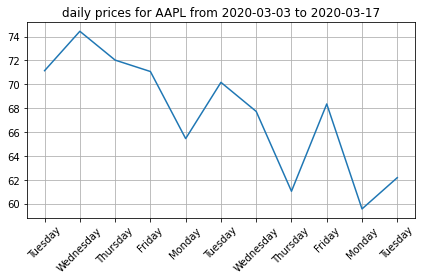

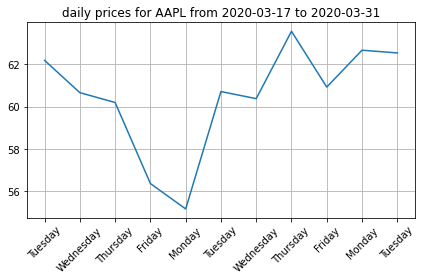

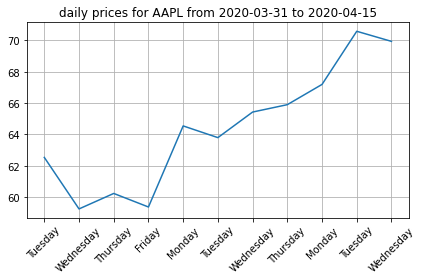

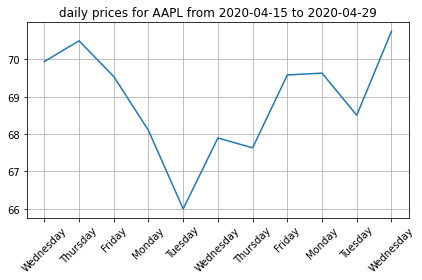

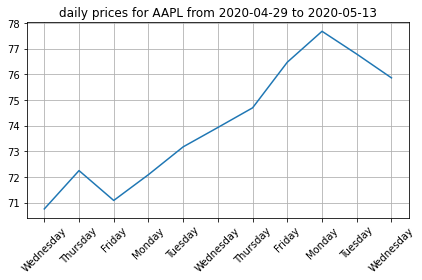

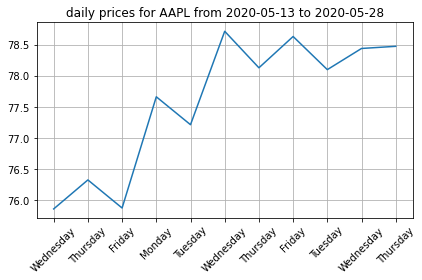

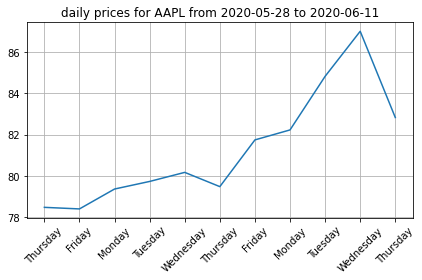

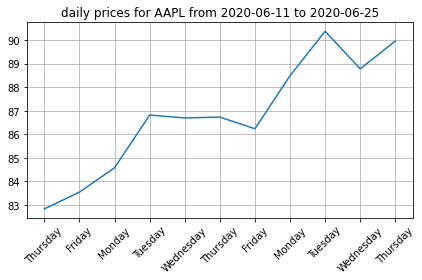

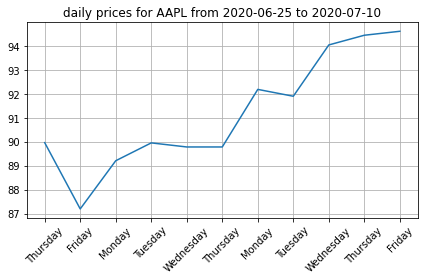

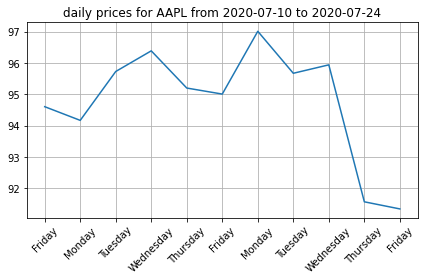

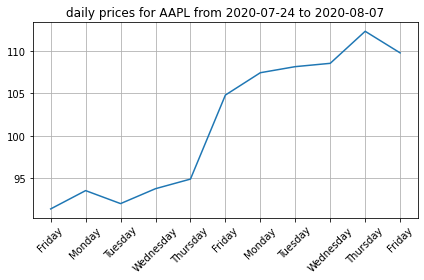

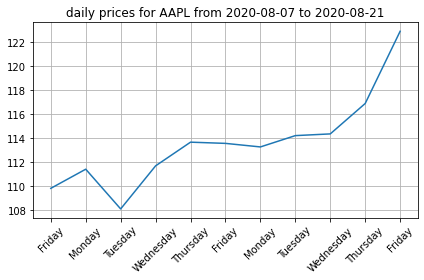

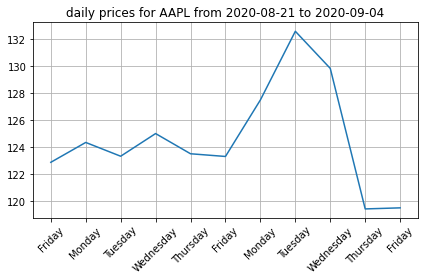

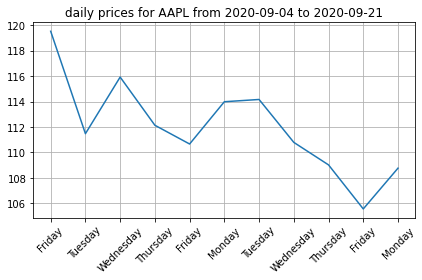

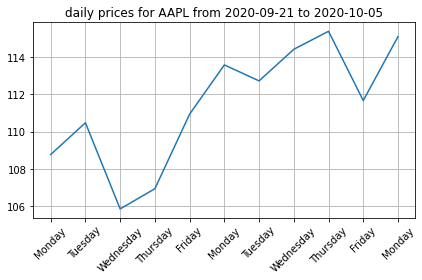

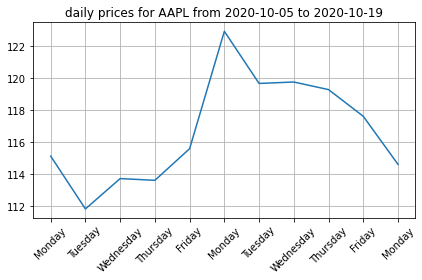

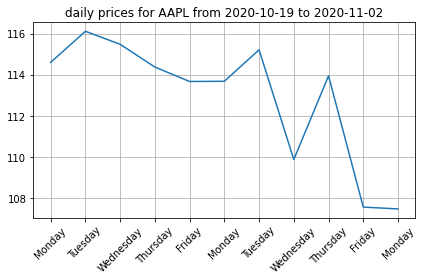

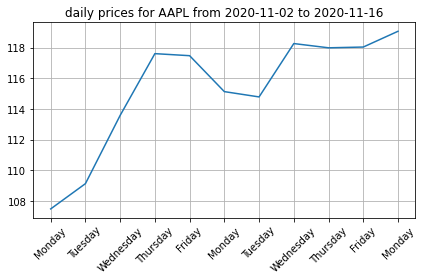

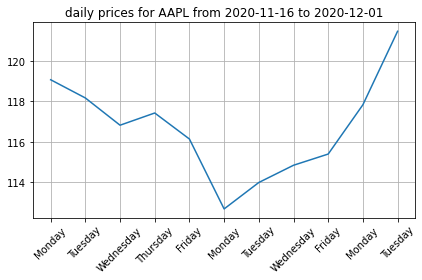

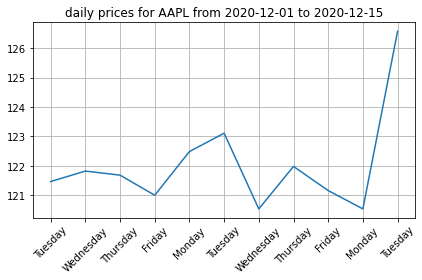

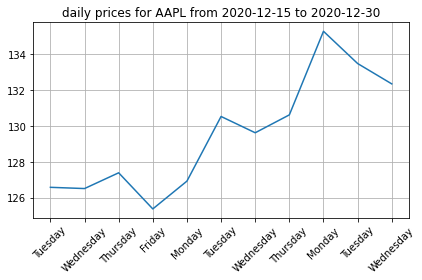

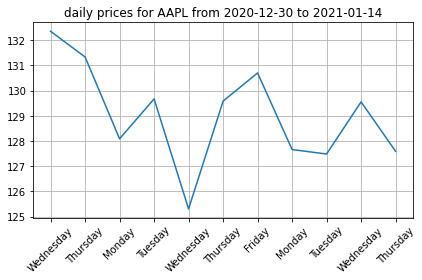

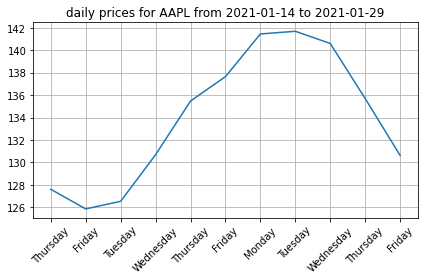

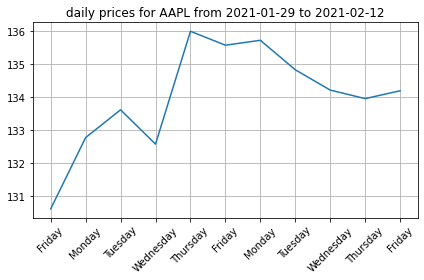

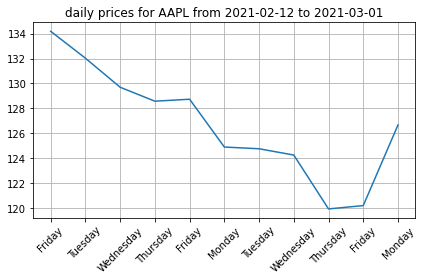

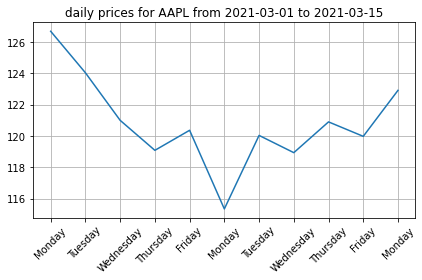

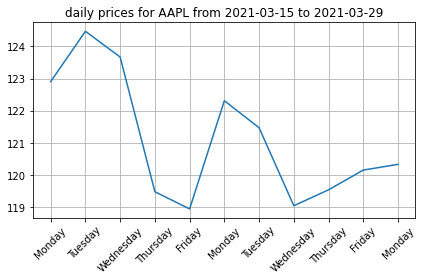

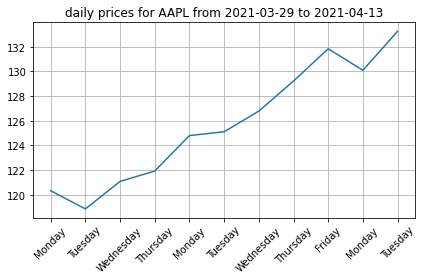

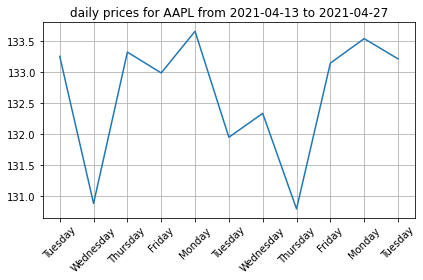

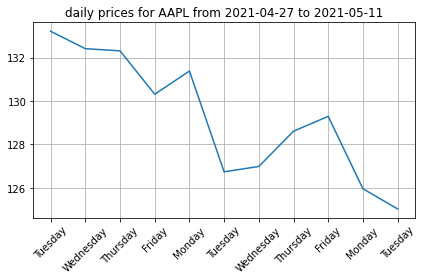

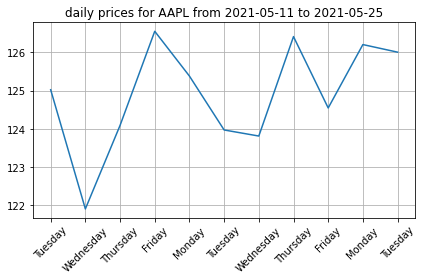

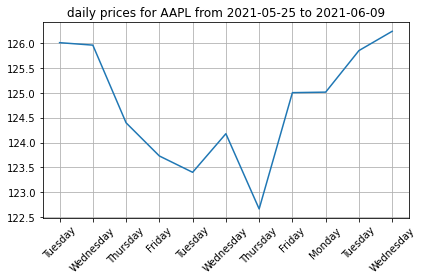

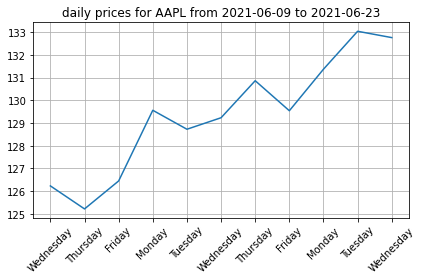

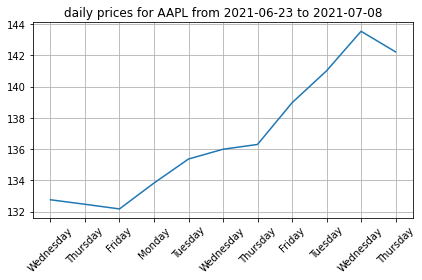

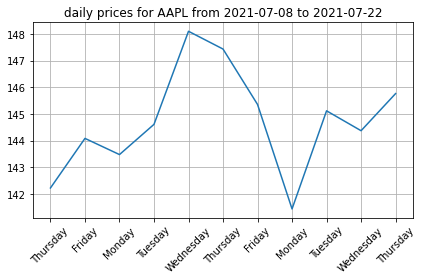

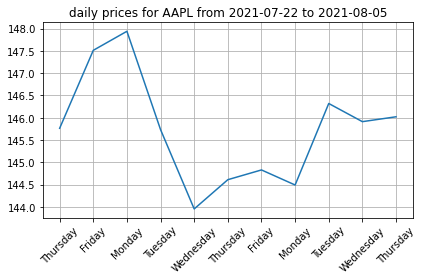

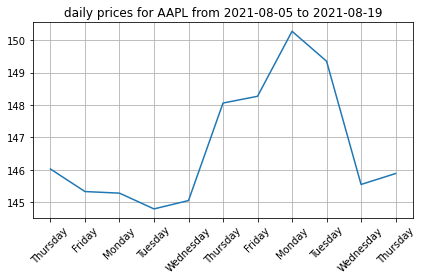

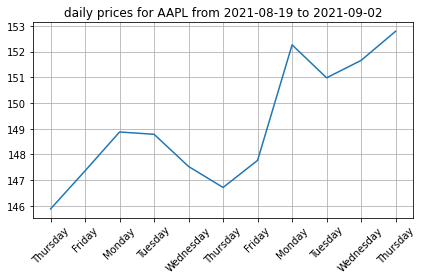

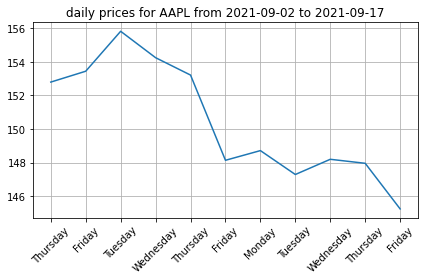

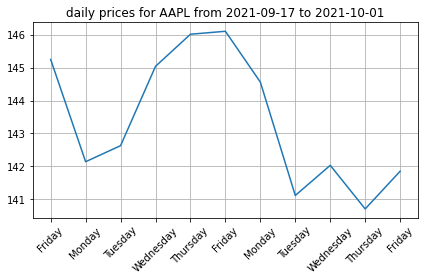

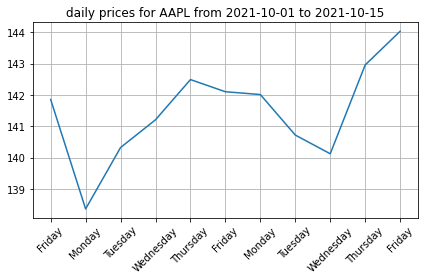

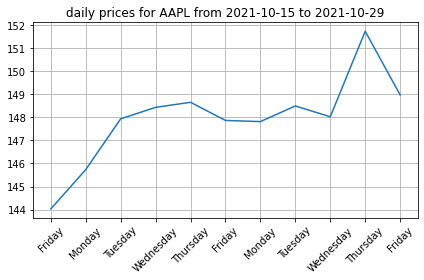

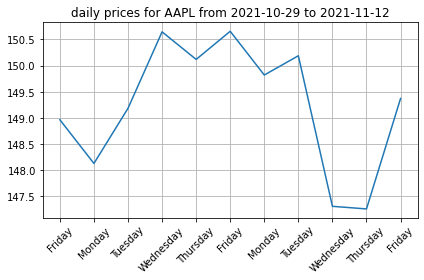

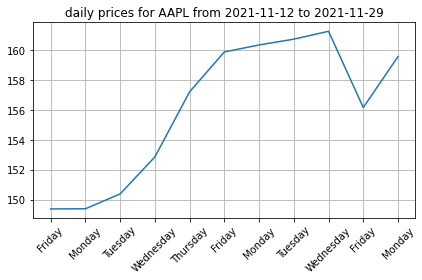

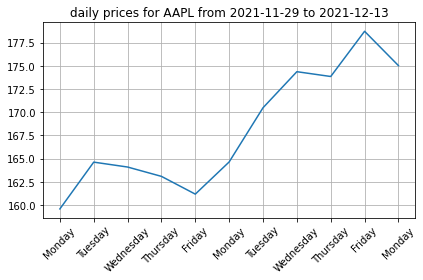

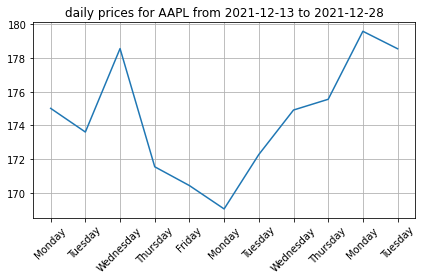

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  5 14:37:29 2018

@author: epinsky
"""
import os
import pandas as pd
import matplotlib.pyplot as plt


ticker="AAPL"

input_dir = os.getcwd()
root_dir = os.getcwd()
plot_dir =os.path.join(input_dir, ticker + "_weekly_plots")
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
ticker_file = os.path.join(input_dir, ticker + '_weekly_return_detailed.csv')

try:   
    df = pd.read_csv(ticker_file)
    for i in range(1, len(df)-10, 10): 
        first_date = df["Date"].iloc[i]
        last_date  = df["Date"].iloc[i+10]
        next_df = df.loc[(df["Date"]>=first_date) & (df["Date"]<=last_date)]
        fig = plt.figure()
        ax = plt.gca()
        df_1 = next_df[['Date','Week_Number','Weekday', 'Day', 'Adj Close']]
        weekday_list = df_1['Weekday'].tolist()
        ticks_list   = df_1['Date'].tolist()
        plt.plot(df_1['Date'], df_1['Adj Close'])
        plt.xticks(ticks_list, weekday_list, rotation=45)
        plt.grid(True)
        plt.title('daily prices for ' + ticker +  ' from ' + first_date + ' to ' + last_date)
        output_file = os.path.join(plot_dir, ticker + '_prices_' + first_date + '_to_' + last_date +  '.jpg')
#        plt.show()
        print("generated " + output_file)
        fig.tight_layout()
        fig.savefig(output_file)
    
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)













